## Web Scraping의 문제점

1. 최근의 Web Page는 매우 복잡
2. Web Page 자체에 프로그램이 내장된 경우 (JavaScript)
3. 통신이 1단계로 끝나지 않음 (AJAX)

## Selenium (셀레늄)

1. 웹 브라우저 자동 제어를 위한 Software
2. 웹 브라우저가 JavaScript 실행, Server와 통신 등을 처리
3. Server와 직접 통신하는 대신, 웹 브라우저를 이용하여 간편하게 스크랩
4. 단점: 직접 웹 브라우저를 Open하여 진행하기 때문에, Scraping 속도가 느림

## How to Install Selenium

In [ ]:
! pip install selenium

## How to Open an Web Browser with Selenium

In [ ]:
from selenium.webdriver import Chrome

browser = Chrome('C:/Users/Joshua Jinseok Kim/Google Drive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data/chromedriver.exe')
browser.get('https://naver.com/')

## Practice with Selenium: TripAdvisor

In [ ]:
url = 'https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d1371740-Reviews-Mugyodong_Bugeokukjib-Seoul.html'

In [ ]:
import requests
import lxml.html

In [ ]:
res = requests.get(url)
root = lxml.html.fromstring(res.text)

In [ ]:
for review in root.cssselect('.partial_entry'):
    print(review.text_content())

**더 보기** 부분이 활성화가 안 되는군.
* 이유: Server 자체에서 HTML 내에 JavaScript를 심어놓았기 때문에, **더 보기** 버튼을 클릭해야 볼 수 있도록 만들어 놓았기 때문임

### "더 보기"도 보일 수 있도록, Selenium을 활용해보자!

In [ ]:
browser.get(url)

**더 보기** 버튼의 source를 살펴보니, class가 2개가 존재함!

In [ ]:
MoreLinks_list = browser.find_elements_by_css_selector('.taLnk.ulBlueLinks')
MoreLinks_list

In [ ]:
# 중요한 점: MoreLinks_list 내의 '더 보기' 버튼을 click() 1번만 실행해도, 전부 다 click을 실행한 결과를 도출!
MoreLinks_list[0].click()

In [ ]:
for review in browser.find_elements_by_css_selector('.partial_entry'):
    print(review.text)

## Korean Language: 한국어 형태소 Analytics Libraries

1. konlpy: hannanum, kkma, okt, komoran 등 Java 기반
2. mecab-ko: 일본어 형태소 분석기인 mecab을 한국어에 맞게 수정
3. kiwi: C++로 개발된 형태소 분석기
4. stanza: Deep Learning 기반 형태소 분석기. 의존 구분 분석도 제공.

## kiwi

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [ ]:
# kiwi 형태소 분석기 준비하기
kiwi.prepare()

0

In [ ]:
text = '오늘은 자연어 처리를 배우기 좋은 날이다. 자연어 처리는 재미있다.'

In [ ]:
result = kiwi.analyze(text)
result

[([('오늘', 'NNG', 0, 2),
   ('은', 'JX', 2, 1),
   ('자연어', 'NNP', 4, 3),
   ('처리', 'NNG', 8, 2),
   ('를', 'JKO', 10, 1),
   ('배우', 'VV', 12, 2),
   ('기', 'ETN', 14, 1),
   ('좋', 'VA', 16, 1),
   ('은', 'ETM', 17, 1),
   ('날', 'NNG', 19, 1),
   ('이', 'VCP', 20, 1),
   ('다', 'EF', 21, 1),
   ('.', 'SF', 22, 1),
   ('자연어', 'NNP', 24, 3),
   ('처리', 'NNG', 28, 2),
   ('는', 'JX', 30, 1),
   ('재미있', 'VA', 32, 3),
   ('다', 'EF', 35, 1),
   ('.', 'SF', 36, 1)],
  -106.402587890625)]

In [ ]:
# result[0]: 실행했던 여러가지 분석 결과 중, 가장 점수가 높은 것

result[0]

([('오늘', 'NNG', 0, 2),
  ('은', 'JX', 2, 1),
  ('자연어', 'NNP', 4, 3),
  ('처리', 'NNG', 8, 2),
  ('를', 'JKO', 10, 1),
  ('배우', 'VV', 12, 2),
  ('기', 'ETN', 14, 1),
  ('좋', 'VA', 16, 1),
  ('은', 'ETM', 17, 1),
  ('날', 'NNG', 19, 1),
  ('이', 'VCP', 20, 1),
  ('다', 'EF', 21, 1),
  ('.', 'SF', 22, 1),
  ('자연어', 'NNP', 24, 3),
  ('처리', 'NNG', 28, 2),
  ('는', 'JX', 30, 1),
  ('재미있', 'VA', 32, 3),
  ('다', 'EF', 35, 1),
  ('.', 'SF', 36, 1)],
 -106.402587890625)

In [ ]:
# result[0][0]: 실행했던 여러가지 분석 결과 중, 가장 점수가 높은 것 중에서, 점수를 제거한 것

result[0][0]

[('오늘', 'NNG', 0, 2),
 ('은', 'JX', 2, 1),
 ('자연어', 'NNP', 4, 3),
 ('처리', 'NNG', 8, 2),
 ('를', 'JKO', 10, 1),
 ('배우', 'VV', 12, 2),
 ('기', 'ETN', 14, 1),
 ('좋', 'VA', 16, 1),
 ('은', 'ETM', 17, 1),
 ('날', 'NNG', 19, 1),
 ('이', 'VCP', 20, 1),
 ('다', 'EF', 21, 1),
 ('.', 'SF', 22, 1),
 ('자연어', 'NNP', 24, 3),
 ('처리', 'NNG', 28, 2),
 ('는', 'JX', 30, 1),
 ('재미있', 'VA', 32, 3),
 ('다', 'EF', 35, 1),
 ('.', 'SF', 36, 1)]

In [ ]:
# Noun만 추출하기
for token, pos, _, _ in result[0][0]:
    if pos.startswith('N'):
        print(token)

오늘
자연어
처리
날
자연어
처리


In [ ]:
# Noun만 추출하는 User Defined Function 만들기
def ExtractNouns(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos.startswith('N'):
            yield token

In [ ]:
list(ExtractNouns('어제는 콜드브루를 마시고, 오늘은 아이스 아메리카노를 마셨는데, 이게 내 행복의 원천이다.'))

['어제', '콜드브루', '오늘', '아이스', '아메리카노', '나', '행복', '원천']

## konlpy

In [ ]:
from konlpy.tag import Komoran

tagger = Komoran()

In [ ]:
text = '오늘은 자연어 처리를 배우기 좋은 날이다. 자연어 처리는 재미있다.'

In [ ]:
tagger.pos(text)

[('오늘', 'NNG'),
 ('은', 'JX'),
 ('자연어', 'NNP'),
 ('처리', 'NNG'),
 ('를', 'JKO'),
 ('배우', 'VV'),
 ('기', 'ETN'),
 ('좋은 날', 'NNP'),
 ('이', 'VCP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('자연어', 'NNP'),
 ('처리', 'NNG'),
 ('는', 'JX'),
 ('재미있', 'VA'),
 ('다', 'EF'),
 ('.', 'SF')]

In [ ]:
# Nouns
tagger.nouns(text)

['오늘', '자연어', '처리', '좋은 날', '자연어', '처리']

## stanza

In [ ]:
import stanza

stanza.download('ko', package='kaist')
nlp = stanza.Pipeline('ko', package='kaist')

2021-08-04 20:26:56 INFO: Downloading these customized packages for language: ko (Korean)...
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |
| pretrain  | kaist   |

2021-08-04 20:26:56 INFO: File exists: C:\Users\Joshua Jinseok Kim\stanza_resources\ko\tokenize\kaist.pt.
2021-08-04 20:26:56 INFO: File exists: C:\Users\Joshua Jinseok Kim\stanza_resources\ko\pos\kaist.pt.
2021-08-04 20:26:56 INFO: File exists: C:\Users\Joshua Jinseok Kim\stanza_resources\ko\lemma\kaist.pt.
2021-08-04 20:26:57 INFO: File exists: C:\Users\Joshua Jinseok Kim\stanza_resources\ko\depparse\kaist.pt.
2021-08-04 20:26:57 INFO: File exists: C:\Users\Joshua Jinseok Kim\stanza_resources\ko\pretrain\kaist.pt.
2021-08-04 20:26:57 INFO: Finished downloading models and saved to C:\Users\Joshua Jinseok Kim\stanza_resources.
2021-08-04 20:26:57 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----

In [ ]:
text = '오늘은 자연어 처리를 배우기 좋은 날이다. 자연어 처리는 재미있다.'

In [ ]:
doc = nlp(text)
doc

[
  [
    {
      "id": 1,
      "text": "오늘은",
      "lemma": "오늘+은",
      "upos": "NOUN",
      "xpos": "ncn+jxt",
      "head": 6,
      "deprel": "dislocated",
      "misc": "start_char=0|end_char=3"
    },
    {
      "id": 2,
      "text": "자연어",
      "lemma": "자연어",
      "upos": "NOUN",
      "xpos": "ncn",
      "head": 3,
      "deprel": "compound",
      "misc": "start_char=4|end_char=7"
    },
    {
      "id": 3,
      "text": "처리를",
      "lemma": "처리+를",
      "upos": "NOUN",
      "xpos": "ncpa+jco",
      "head": 4,
      "deprel": "obj",
      "misc": "start_char=8|end_char=11"
    },
    {
      "id": 4,
      "text": "배우기",
      "lemma": "배우+기",
      "upos": "VERB",
      "xpos": "pvg+etn",
      "head": 5,
      "deprel": "nmod",
      "misc": "start_char=12|end_char=15"
    },
    {
      "id": 5,
      "text": "좋은",
      "lemma": "좋+ㄴ",
      "upos": "ADJ",
      "xpos": "paa+etm",
      "head": 6,
      "deprel": "amod",
      "misc": "start_char=16|end_cha

In [ ]:
sentence = doc.sentences[0]
sentence

[
  {
    "id": 1,
    "text": "오늘은",
    "lemma": "오늘+은",
    "upos": "NOUN",
    "xpos": "ncn+jxt",
    "head": 6,
    "deprel": "dislocated",
    "misc": "start_char=0|end_char=3"
  },
  {
    "id": 2,
    "text": "자연어",
    "lemma": "자연어",
    "upos": "NOUN",
    "xpos": "ncn",
    "head": 3,
    "deprel": "compound",
    "misc": "start_char=4|end_char=7"
  },
  {
    "id": 3,
    "text": "처리를",
    "lemma": "처리+를",
    "upos": "NOUN",
    "xpos": "ncpa+jco",
    "head": 4,
    "deprel": "obj",
    "misc": "start_char=8|end_char=11"
  },
  {
    "id": 4,
    "text": "배우기",
    "lemma": "배우+기",
    "upos": "VERB",
    "xpos": "pvg+etn",
    "head": 5,
    "deprel": "nmod",
    "misc": "start_char=12|end_char=15"
  },
  {
    "id": 5,
    "text": "좋은",
    "lemma": "좋+ㄴ",
    "upos": "ADJ",
    "xpos": "paa+etm",
    "head": 6,
    "deprel": "amod",
    "misc": "start_char=16|end_char=18"
  },
  {
    "id": 6,
    "text": "날이다",
    "lemma": "날+이+다",
    "upos": "VERB",
    "xpos": "

In [ ]:
word = sentence.words[0]
word

{
  "id": 1,
  "text": "오늘은",
  "lemma": "오늘+은",
  "upos": "NOUN",
  "xpos": "ncn+jxt",
  "head": 6,
  "deprel": "dislocated",
  "misc": "start_char=0|end_char=3"
}

In [ ]:
# lemma (표제어)
word.lemma

'오늘+은'

In [ ]:
# Part of Speech (품사)
word.xpos

'ncn+jxt'

## stanza: 단어와 품사 태그 짝짓기

In [ ]:
lemma = word.lemma.split('+')
lemma

['오늘', '은']

In [ ]:
xpos = word.xpos.split('+')
xpos

['ncn', 'jxt']

In [ ]:
list(zip(lemma, xpos))

[('오늘', 'ncn'), ('은', 'jxt')]

Now, let's apply the ZIP function to the every word!

In [ ]:
lemma_xpos_list = []


for sentence in doc.sentences:
    for word in sentence.words:
        lemma_list = word.lemma.split('+')
        xpos_list = word.xpos.split('+')
        for lemma, xpos in zip(lemma_list, xpos_list):
            lemma_xpos_list.append((lemma, xpos))

## stanza: 명사 추출

In [ ]:
text = '오늘은 콜드브루를 마셨는데, 피곤한 아침에 잠을 깨기 위해 내가 늘 선택하는 방법이다.'

In [ ]:
doc = nlp(text)
doc

[
  [
    {
      "id": 1,
      "text": "오늘은",
      "lemma": "오늘+은",
      "upos": "NOUN",
      "xpos": "ncn+jxt",
      "head": 13,
      "deprel": "dislocated",
      "misc": "start_char=0|end_char=3"
    },
    {
      "id": 2,
      "text": "콜드브루를",
      "lemma": "콜드브루+를",
      "upos": "PROPN",
      "xpos": "nq+jco",
      "head": 3,
      "deprel": "obj",
      "misc": "start_char=4|end_char=9"
    },
    {
      "id": 3,
      "text": "마셨는데",
      "lemma": "마셨+는데",
      "upos": "SCONJ",
      "xpos": "pvg+ep+ecs",
      "head": 13,
      "deprel": "ccomp",
      "misc": "start_char=10|end_char=14"
    },
    {
      "id": 4,
      "text": ",",
      "lemma": ",",
      "upos": "PUNCT",
      "xpos": "sp",
      "head": 3,
      "deprel": "punct",
      "misc": "start_char=14|end_char=15"
    },
    {
      "id": 5,
      "text": "피곤한",
      "lemma": "피곤+하+ㄴ",
      "upos": "VERB",
      "xpos": "ncps+xsm+etm",
      "head": 6,
      "deprel": "amod",
      "misc": "start

In [ ]:
nouns_list = []

for sentence in doc.sentences:
    for word in sentence.words:
        lemma_list = word.lemma.split('+')
        xpos_list = word.xpos.split('+')
        for lemma, xpos in zip(lemma_list, xpos_list):
            if xpos.startswith('n'):
                nouns_list.append(lemma)

nouns_list

['오늘', '콜드브루', '피곤', '아침', '잠', '내', '선택', '방법']

Let's create a user defined function for extracting nouns!

In [ ]:
def ExtractNouns(text):
    doc = nlp(text)
    
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma_list = word.lemma.split('+')
            xpos_list = word.xpos.split('+')
            for lemma, xpos in zip(lemma_list, xpos_list):
                if xpos.startswith('n'):
                    yield lemma

In [ ]:
list(ExtractNouns(text))

['오늘', '콜드브루', '피곤', '아침', '잠', '내', '선택', '방법']

## Korean TDM

In [ ]:
# Load the Naver Movie Review Data

import requests
import lxml.html

# res = requests.get('https://github.com/e9t/nsmc/raw/master/ratings_train.txt')

# with open('data/nsmc_train.csv', 'wb') as f:
#     f.write(res.content)

In [ ]:
import pandas as pd

movie_df = pd.read_csv('data/nsmc_train.csv', sep='\t')
movie_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
movie_df.shape

(150000, 3)

In [ ]:
import stanza

nlp = stanza.Pipeline('ko', package='kaist')

2021-08-04 20:36:35 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-08-04 20:36:35 INFO: Use device: cpu
2021-08-04 20:36:35 INFO: Loading: tokenize
2021-08-04 20:36:35 INFO: Loading: pos
2021-08-04 20:36:35 INFO: Loading: lemma
2021-08-04 20:36:36 INFO: Loading: depparse
2021-08-04 20:36:37 INFO: Done loading processors!


In [ ]:
text = movie_df.loc[0, 'document']
text

'아 더빙.. 진짜 짜증나네요 목소리'

In [ ]:
doc = nlp(text)
doc

[
  [
    {
      "id": 1,
      "text": "아",
      "lemma": "아",
      "upos": "INTJ",
      "xpos": "ii",
      "head": 2,
      "deprel": "discourse",
      "misc": "start_char=0|end_char=1"
    },
    {
      "id": 2,
      "text": "더빙",
      "lemma": "더빙",
      "upos": "NOUN",
      "xpos": "ncn",
      "head": 0,
      "deprel": "root",
      "misc": "start_char=2|end_char=4"
    },
    {
      "id": 3,
      "text": ".",
      "lemma": ".",
      "upos": "PUNCT",
      "xpos": "sf",
      "head": 2,
      "deprel": "punct",
      "misc": "start_char=4|end_char=5"
    },
    {
      "id": 4,
      "text": ".",
      "lemma": ".",
      "upos": "PUNCT",
      "xpos": "sf",
      "head": 2,
      "deprel": "punct",
      "misc": "start_char=5|end_char=6"
    }
  ],
  [
    {
      "id": 1,
      "text": "진짜",
      "lemma": "진짜",
      "upos": "NOUN",
      "xpos": "ncn",
      "head": 2,
      "deprel": "advmod",
      "misc": "start_char=7|end_char=9"
    },
    {
      "id": 2

In [ ]:
for sentence in doc.sentences:
    for word in sentence.words:
        lemma_list = word.lemma.split('+')
        xpos_list = word.xpos.split('+')
        for lemma, xpos in zip(lemma_list, xpos_list):
            print(lemma)

아
더빙
.
.
진짜
짜증나네
요
목소리


In [ ]:
def ExtractNouns(text):
    doc = nlp(text)
    
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma_list = word.lemma.split('+')
            xpos_list = word.xpos.split('+')
            for lemma, xpos in zip(lemma_list, xpos_list):
                if xpos.startswith('n') == True:
                    yield lemma

In [ ]:
list(ExtractNouns(text))

['더빙', '진짜', '목소리']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    max_features=100,
    tokenizer=ExtractNouns
)

In [ ]:
tdm = cv.fit_transform(movie_df.loc[:1000, 'document'])
tdm.shape

(1001, 100)

In [ ]:
import numpy as np
import pandas as pd

TermCount_df = pd.DataFrame({
    'Term': cv.get_feature_names(),
    'Frequency': tdm.sum(axis=0).flat
})

TermCount_df = TermCount_df.sort_values('Frequency', ascending=False).reset_index(drop=True)
TermCount_df.head()

,Term,Frequency
0,영화,226
1,진짜,53
2,이,53
3,연기,44
4,최고,41


In [ ]:
TermCount_df.to_excel('data/nsmc-count.xlsx')

## Korean Word Cloud

In [ ]:
TermCount_df = pd.read_excel('data/nsmc-count.xlsx', index_col=0)
TermCount_df.head()

,Term,Frequency
0,영화,226
1,진짜,53
2,이,53
3,연기,44
4,최고,41


In [ ]:
TermCount_dict = TermCount_df.set_index('Term')['Frequency'].to_dict()

In [ ]:
from wordcloud import WordCloud

wc = WordCloud

In [ ]:
cloud = wc.generate_from_frequencies(TermCount_dict)
cloud.to_image()

TypeError: generate_from_frequencies() missing 1 required positional argument: 'frequencies'

hangeul.naver.com/font 에서 Font를 download해야 위와 같은 Error가 발생하지 않는다.

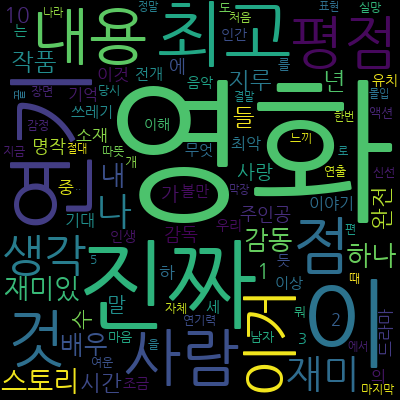

In [ ]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='black',
              width=400, height=400)
cloud = wc.generate_from_frequencies(TermCount_dict)
cloud.to_image()

In [ ]:
cloud.to_file('data/cloud_korean.png')